In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.grid'] = True

In [2]:
data = pd.read_csv('Nutrition_Value_Dataset.csv')
data

,Company,Category,Product,Per Serve Size,Energy (kCal),Carbohydrates (g),Protein (g),Fiber (g),Sugar (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg)
0,Pizza Hut,All Meals,Corn n Cheese (Personal),143.5 g,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19,499.72
1,Pizza Hut,All Meals,Country Feast (Personal),178 g,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80,818.00
2,Pizza Hut,All Meals,Double Cheese (Personal),143 g,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75,638.22
3,Pizza Hut,All Meals,Double Paneer Supreme (Personal),174.5 g,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72,1128.11
4,Pizza Hut,All Meals,Farmer`s Pick (Personal),177 g,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09,942.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Dominos,All Meals,CHICKEN WINGS,174.0,352.90,24.50,35.30,5.76,10.4,12.60,4.80,0.19,308.70,NaN
526,Dominos,All Meals,CRISPY CHICKEN STRIPS,156.0,461.20,51.30,26.70,5.16,3.6,13.90,4.30,0.17,713.07,NaN
527,Dominos,All Meals,ZINGY PARCEL CHICKEN,210.0,667.50,17.30,19.20,16.92,10.6,31.30,14.10,0.56,541.49,NaN
528,Dominos,All Meals,TACO MEXICANA - CHICKEN,97.0,322.60,34.20,9.30,5.40,3.9,16.50,4.50,0.18,564.30,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            530 non-null    object 
 1   Category           530 non-null    object 
 2   Product            530 non-null    object 
 3   Per Serve Size     530 non-null    object 
 4   Energy (kCal)      530 non-null    float64
 5   Carbohydrates (g)  530 non-null    float64
 6   Protein (g)        530 non-null    float64
 7   Fiber (g)          530 non-null    float64
 8   Sugar (g)          530 non-null    float64
 9   Total Fat (g)      530 non-null    float64
 10  Saturated Fat (g)  530 non-null    float64
 11  Trans Fat (g)      530 non-null    float64
 12  Cholesterol (mg)   530 non-null    float64
 13  Sodium (mg)        443 non-null    float64
dtypes: float64(10), object(4)
memory usage: 58.1+ KB


In [4]:
data.describe()

,Energy (kCal),Carbohydrates (g),Protein (g),Fiber (g),Sugar (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg)
count,530.000000,530.000000,530.000000,530.0000,530.000000,530.000000,530.000000,530.000000,530.000000,443.000000
mean,377.304470,39.442302,16.710340,inf,8.276226,13.228528,5.946302,0.279443,118.620434,422.431578
std,338.315722,21.196943,24.425784,NaN,12.186627,10.740934,4.844024,3.265604,502.865434,471.300077
min,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.750000,24.227500,5.000000,1.6900,0.000000,5.000000,2.500000,0.030000,9.462500,1.450000
50%,329.645000,38.570000,11.445000,3.0000,3.200000,12.600000,5.240000,0.110000,30.085000,220.000000
75%,451.812500,54.120000,20.005000,5.9975,9.850000,18.360000,8.095000,0.207500,77.535000,754.975000
max,2880.000000,137.800000,203.000000,inf,64.220000,82.600000,33.000000,75.260000,9769.700000,2399.490000


There is a problem in fiber column

# Data Cleaning

In [5]:
#Lowercase columns name
data.columns = data.columns.str.strip().str.lower()

#Convert first 3 columns in strings and lowercase the values
data.iloc[:,[0,1,2]] = data.iloc[:,[0,1,2]].astype(str)

for i in range(3):
    data.iloc[:,i] = data.iloc[:,i].str.lower()
data

,company,category,product,per serve size,energy (kcal),carbohydrates (g),protein (g),fiber (g),sugar (g),total fat (g),saturated fat (g),trans fat (g),cholesterol (mg),sodium (mg)
0,pizza hut,all meals,corn n cheese (personal),143.5 g,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19,499.72
1,pizza hut,all meals,country feast (personal),178 g,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80,818.00
2,pizza hut,all meals,double cheese (personal),143 g,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75,638.22
3,pizza hut,all meals,double paneer supreme (personal),174.5 g,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72,1128.11
4,pizza hut,all meals,farmer`s pick (personal),177 g,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09,942.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,dominos,all meals,chicken wings,174.0,352.90,24.50,35.30,5.76,10.4,12.60,4.80,0.19,308.70,NaN
526,dominos,all meals,crispy chicken strips,156.0,461.20,51.30,26.70,5.16,3.6,13.90,4.30,0.17,713.07,NaN
527,dominos,all meals,zingy parcel chicken,210.0,667.50,17.30,19.20,16.92,10.6,31.30,14.10,0.56,541.49,NaN
528,dominos,all meals,taco mexicana - chicken,97.0,322.60,34.20,9.30,5.40,3.9,16.50,4.50,0.18,564.30,NaN


In [6]:
#Drop Sodium column
data.drop('sodium (mg)', axis=1, inplace=True)

In [7]:
idx = data['fiber (g)'].argmax()
data.iloc[idx,:]

company                              burger king
category                               all meals
product              chicken wings fried ( 2pcs)
per serve size                               78*
energy (kcal)                              167.5
carbohydrates (g)                            0.9
protein (g)                                 17.7
fiber (g)                                    inf
sugar (g)                                    0.0
total fat (g)                               10.3
saturated fat (g)                            4.0
trans fat (g)                                0.0
cholesterol (mg)                          182.31
Name: 166, dtype: object

Let's drop this (or these) row(s)

In [8]:
# Replace infinite updated data with nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
data.dropna(inplace=True)

In [9]:
data.describe()

,energy (kcal),carbohydrates (g),protein (g),fiber (g),sugar (g),total fat (g),saturated fat (g),trans fat (g),cholesterol (mg)
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,373.818906,39.515364,16.094789,4.688276,8.403065,13.025326,5.891456,0.283726,85.201686
std,335.824683,20.604596,23.592723,5.700365,12.236276,10.345230,4.740833,3.290395,193.457779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.750000,24.550000,5.000000,1.680000,0.000000,4.850000,2.500000,0.040000,9.427500
50%,322.900000,38.800000,10.950000,3.000000,3.290000,12.595000,5.240000,0.120000,30.000000
75%,450.630000,54.120000,19.667500,5.767500,10.315000,18.097500,8.080000,0.210000,73.267500
max,2880.000000,101.000000,203.000000,45.000000,64.220000,82.600000,33.000000,75.260000,2119.750000


In [10]:
data.shape

(522, 13)

8 rows were dropped

# EDA

### Numeric Columns

In [11]:
numeric_cols = data.select_dtypes(include=['float']).columns
num_df = data.loc[:,numeric_cols]
num_df.describe()

,energy (kcal),carbohydrates (g),protein (g),fiber (g),sugar (g),total fat (g),saturated fat (g),trans fat (g),cholesterol (mg)
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,373.818906,39.515364,16.094789,4.688276,8.403065,13.025326,5.891456,0.283726,85.201686
std,335.824683,20.604596,23.592723,5.700365,12.236276,10.345230,4.740833,3.290395,193.457779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.750000,24.550000,5.000000,1.680000,0.000000,4.850000,2.500000,0.040000,9.427500
50%,322.900000,38.800000,10.950000,3.000000,3.290000,12.595000,5.240000,0.120000,30.000000
75%,450.630000,54.120000,19.667500,5.767500,10.315000,18.097500,8.080000,0.210000,73.267500
max,2880.000000,101.000000,203.000000,45.000000,64.220000,82.600000,33.000000,75.260000,2119.750000


There is a problem in the column fiber, let's try to plot it

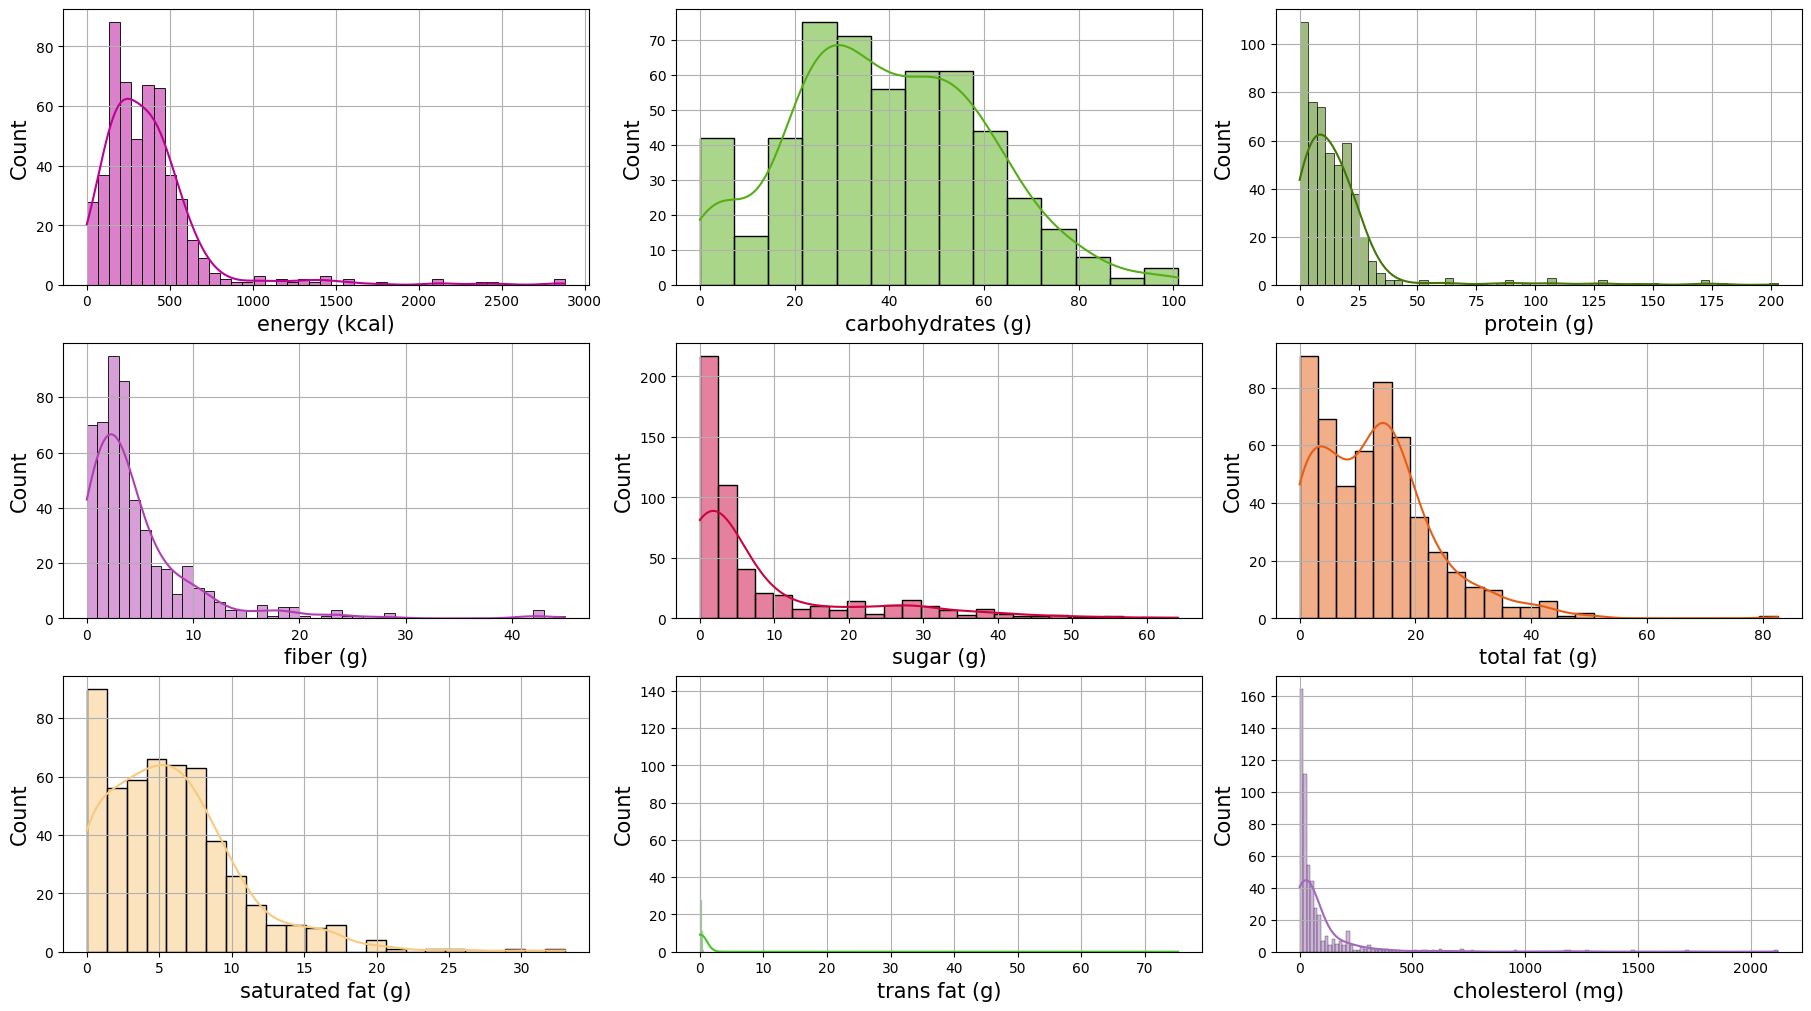

In [12]:
_, axes = plt.subplots(3, 3, constrained_layout=True)
for col, ax in zip(num_df.columns, axes.flatten()):

    sns.histplot(num_df[col], kde=True, color=np.random.rand(3), ax=ax)

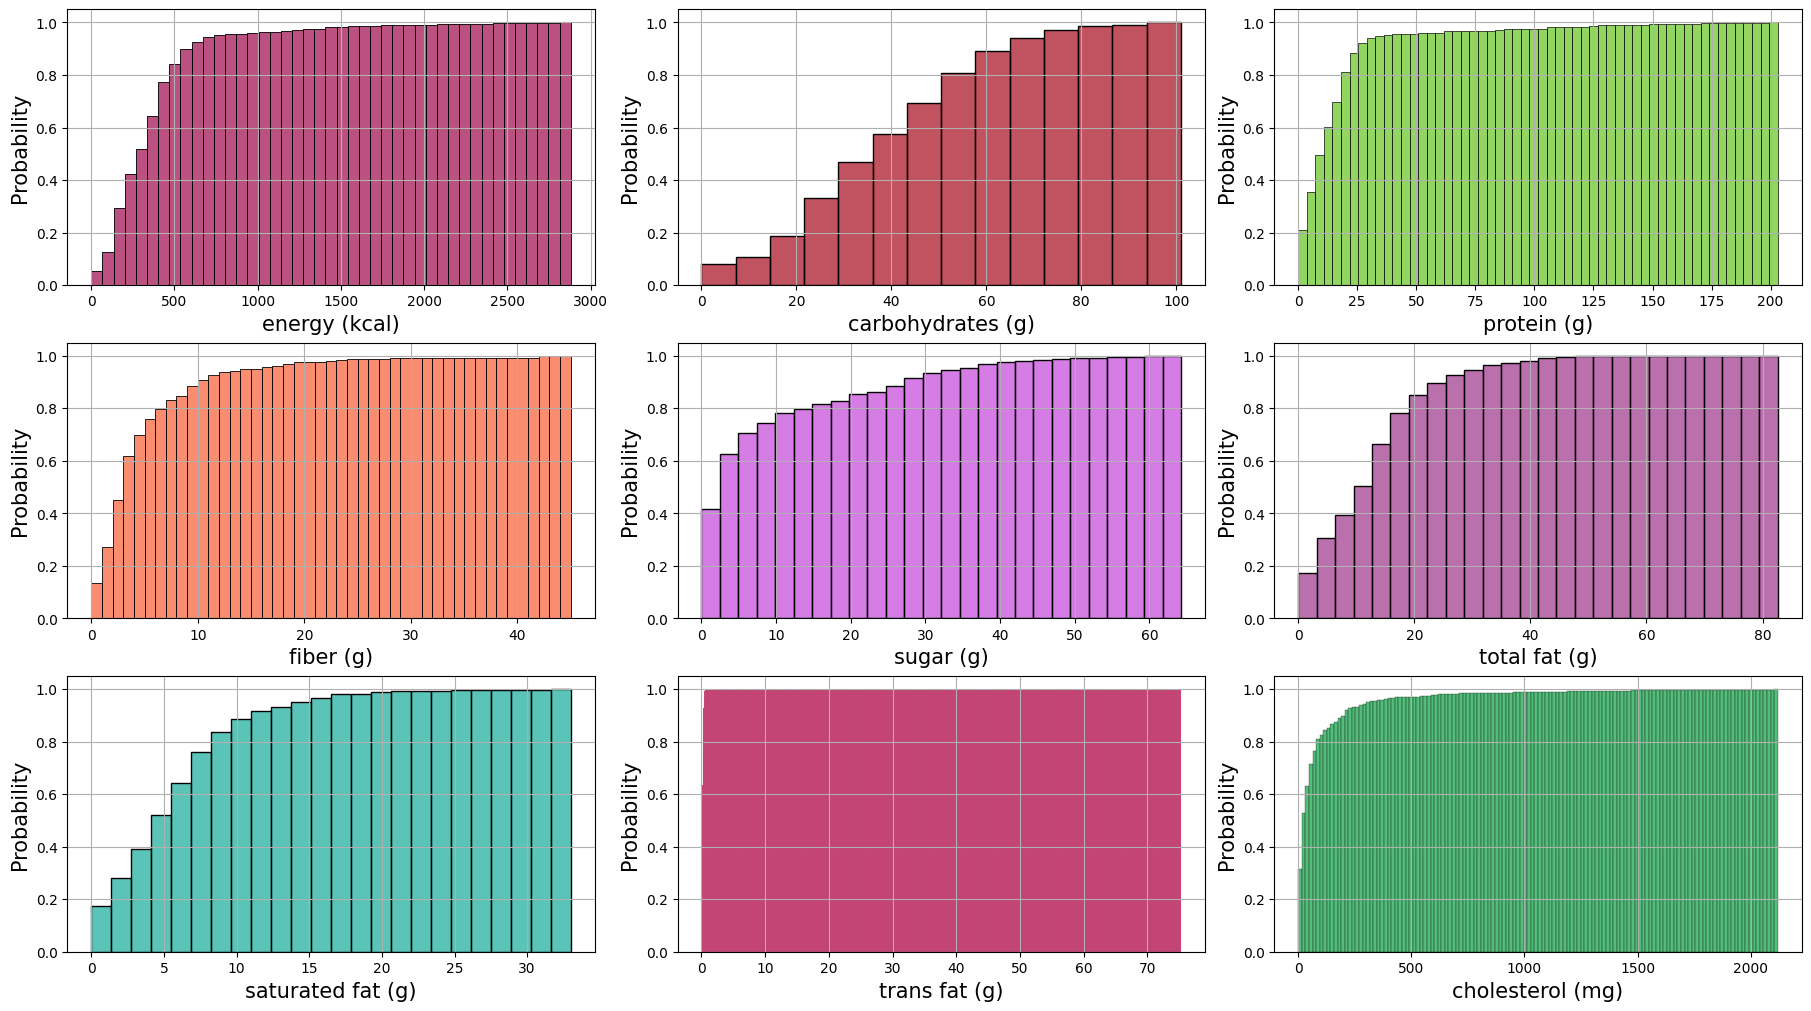

In [13]:
_, axes = plt.subplots(3, 3, constrained_layout=True)
for col, ax in zip(num_df.columns, axes.flatten()):

    sns.histplot(num_df[col], stat='probability', cumulative=True, color=np.random.rand(3), ax=ax)


A thing one can notice is that trans fat column has 75% of data at 0.2 while the max is at 75. There are clearly outliers. \
This charateristic is similar in cholesterol.
Let's try to understand better what happens in fiber column. \
In general most of the data are in the first half of the range.

Now we'll drop outliers based on the empirical cumulative and see correlations beween features.

In [14]:
filters = (num_df['energy (kcal)']<=1000) & (num_df['protein (g)']<=50) & (num_df['trans fat (g)']<=0.5) & (num_df['cholesterol (mg)']<=500)
num_df_out = num_df[filters]

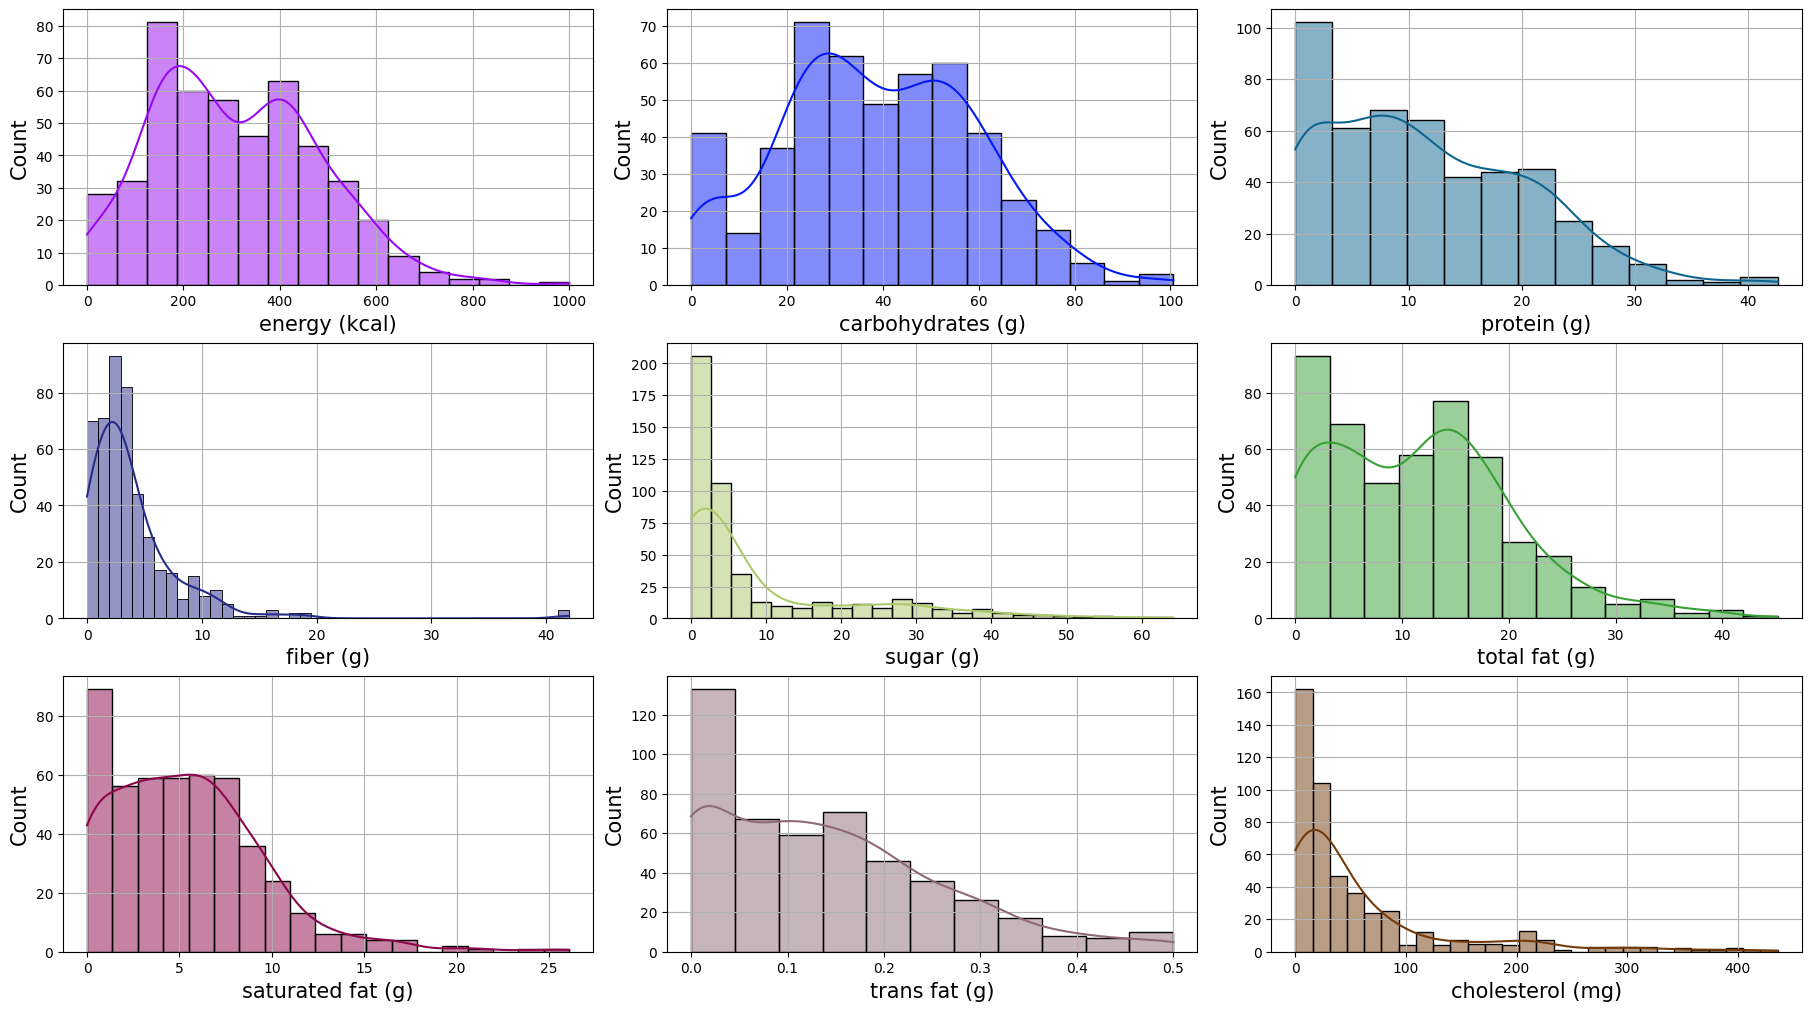

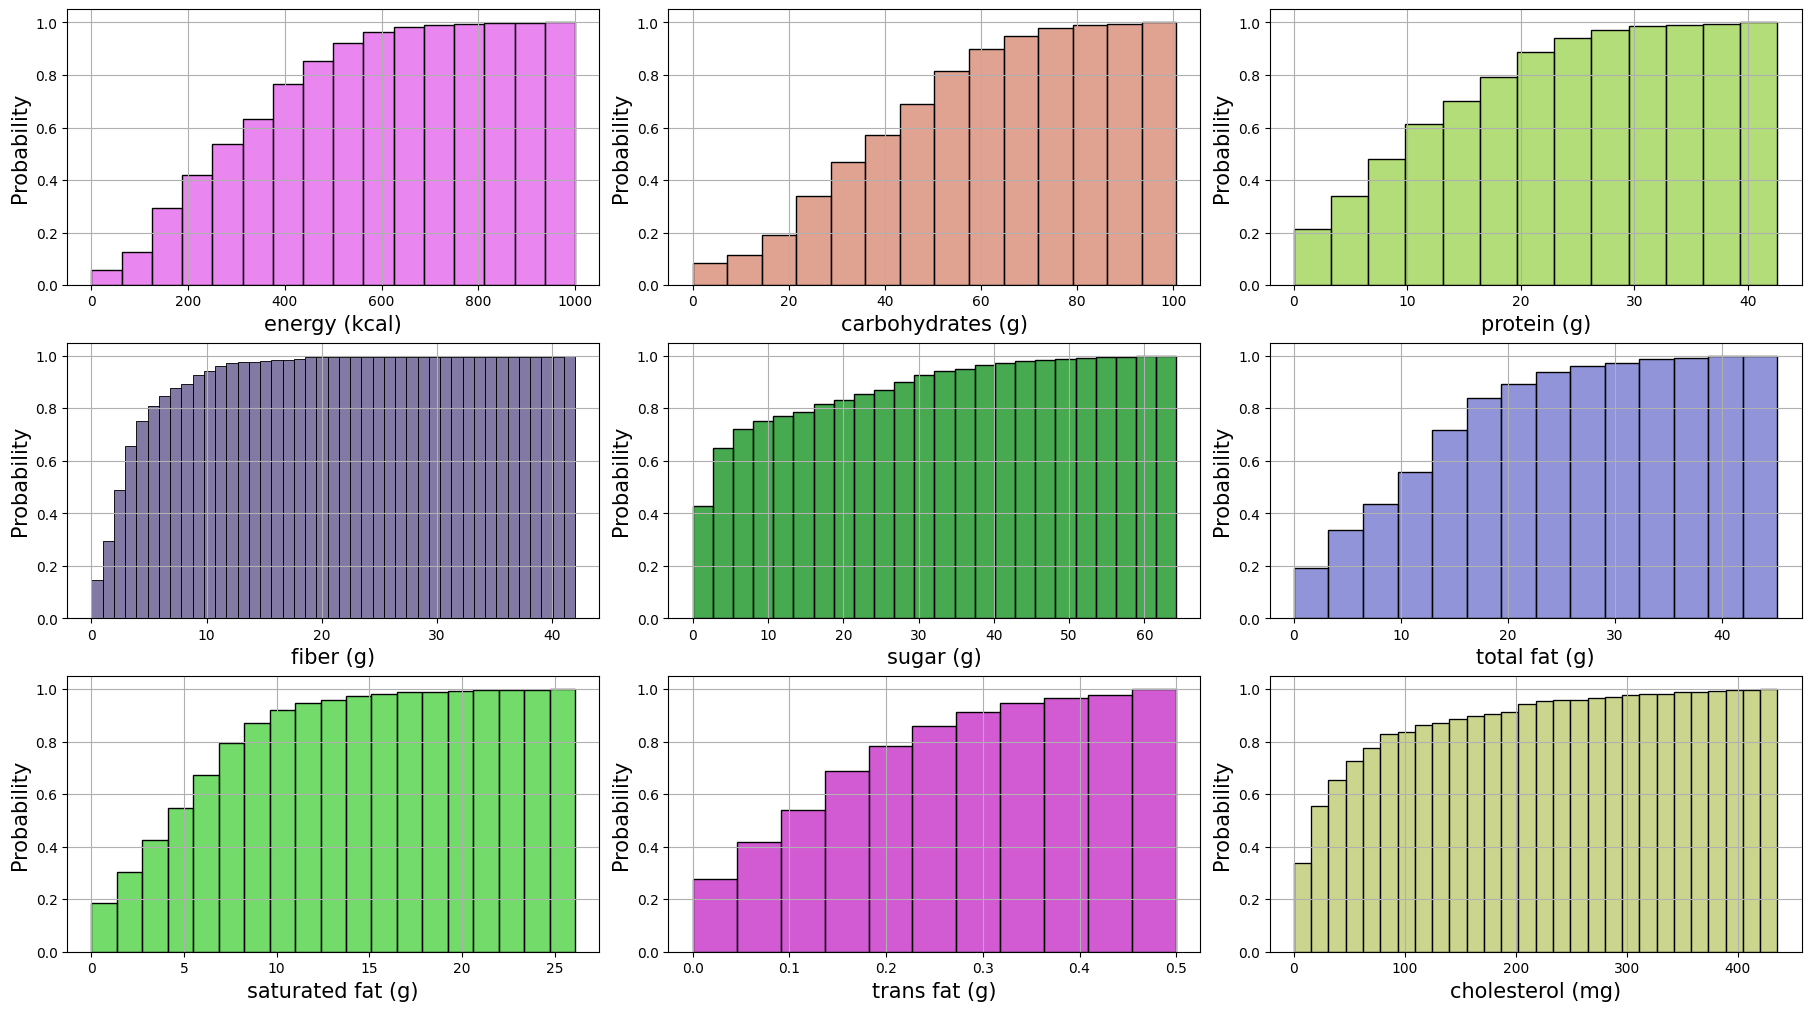

In [15]:
_, axes = plt.subplots(3, 3, constrained_layout=True)
for col, ax in zip(num_df_out.columns, axes.flatten()):
    sns.histplot(num_df_out[col], kde=True, ax=ax, color=np.random.rand(3))
plt.show() 

_, axes = plt.subplots(3, 3, constrained_layout=True)
for col, ax in zip(num_df_out.columns, axes.flatten()):
    sns.histplot(num_df_out[col], cumulative=True, stat='probability', ax=ax, color=np.random.rand(3))

(480, 9)

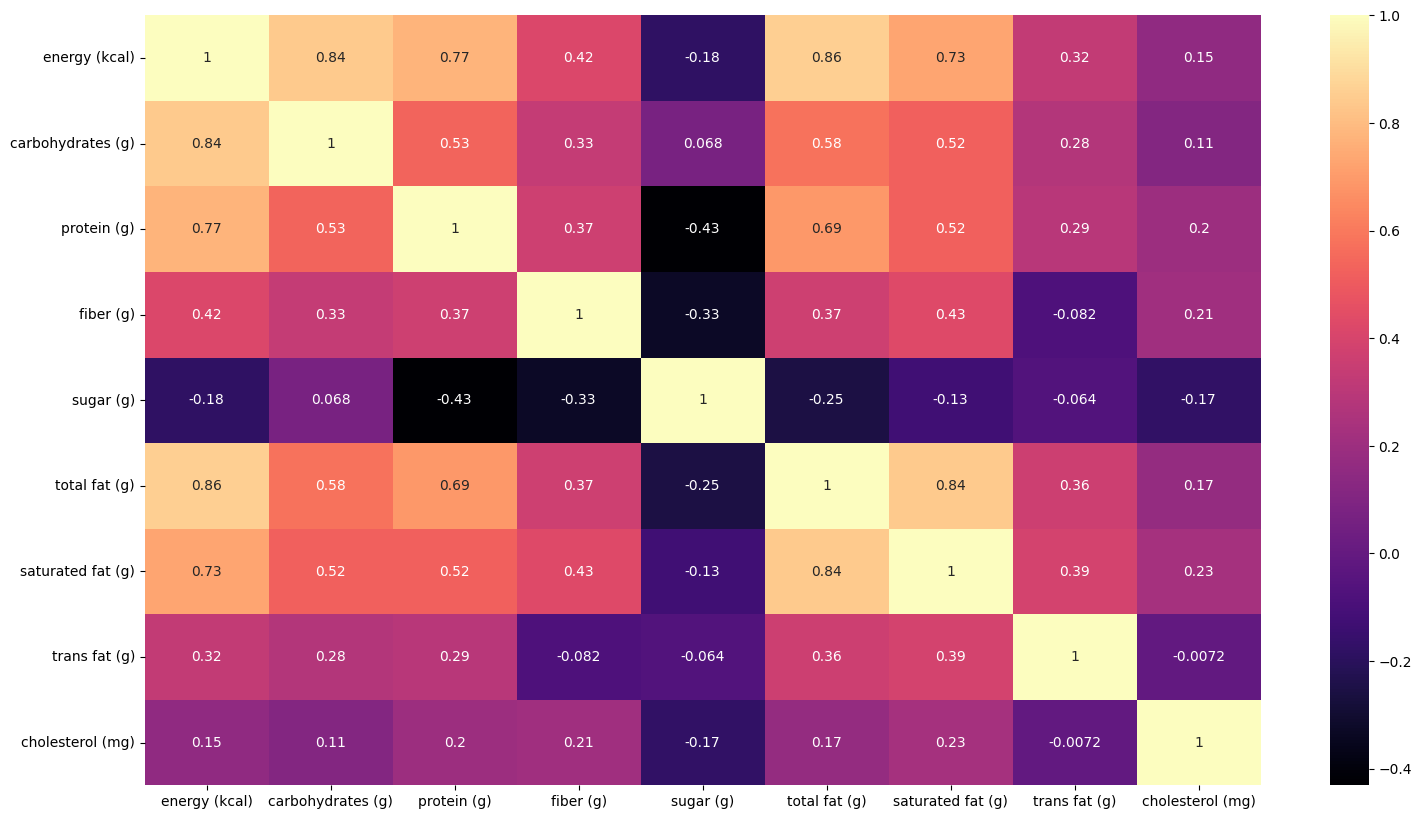

In [16]:
sns.heatmap(num_df_out.corr(), annot=True, cmap='magma')
num_df_out.shape

Excluding outliers we dropped 50 rows. \
There are some high correlations beetween features let's visualize these.

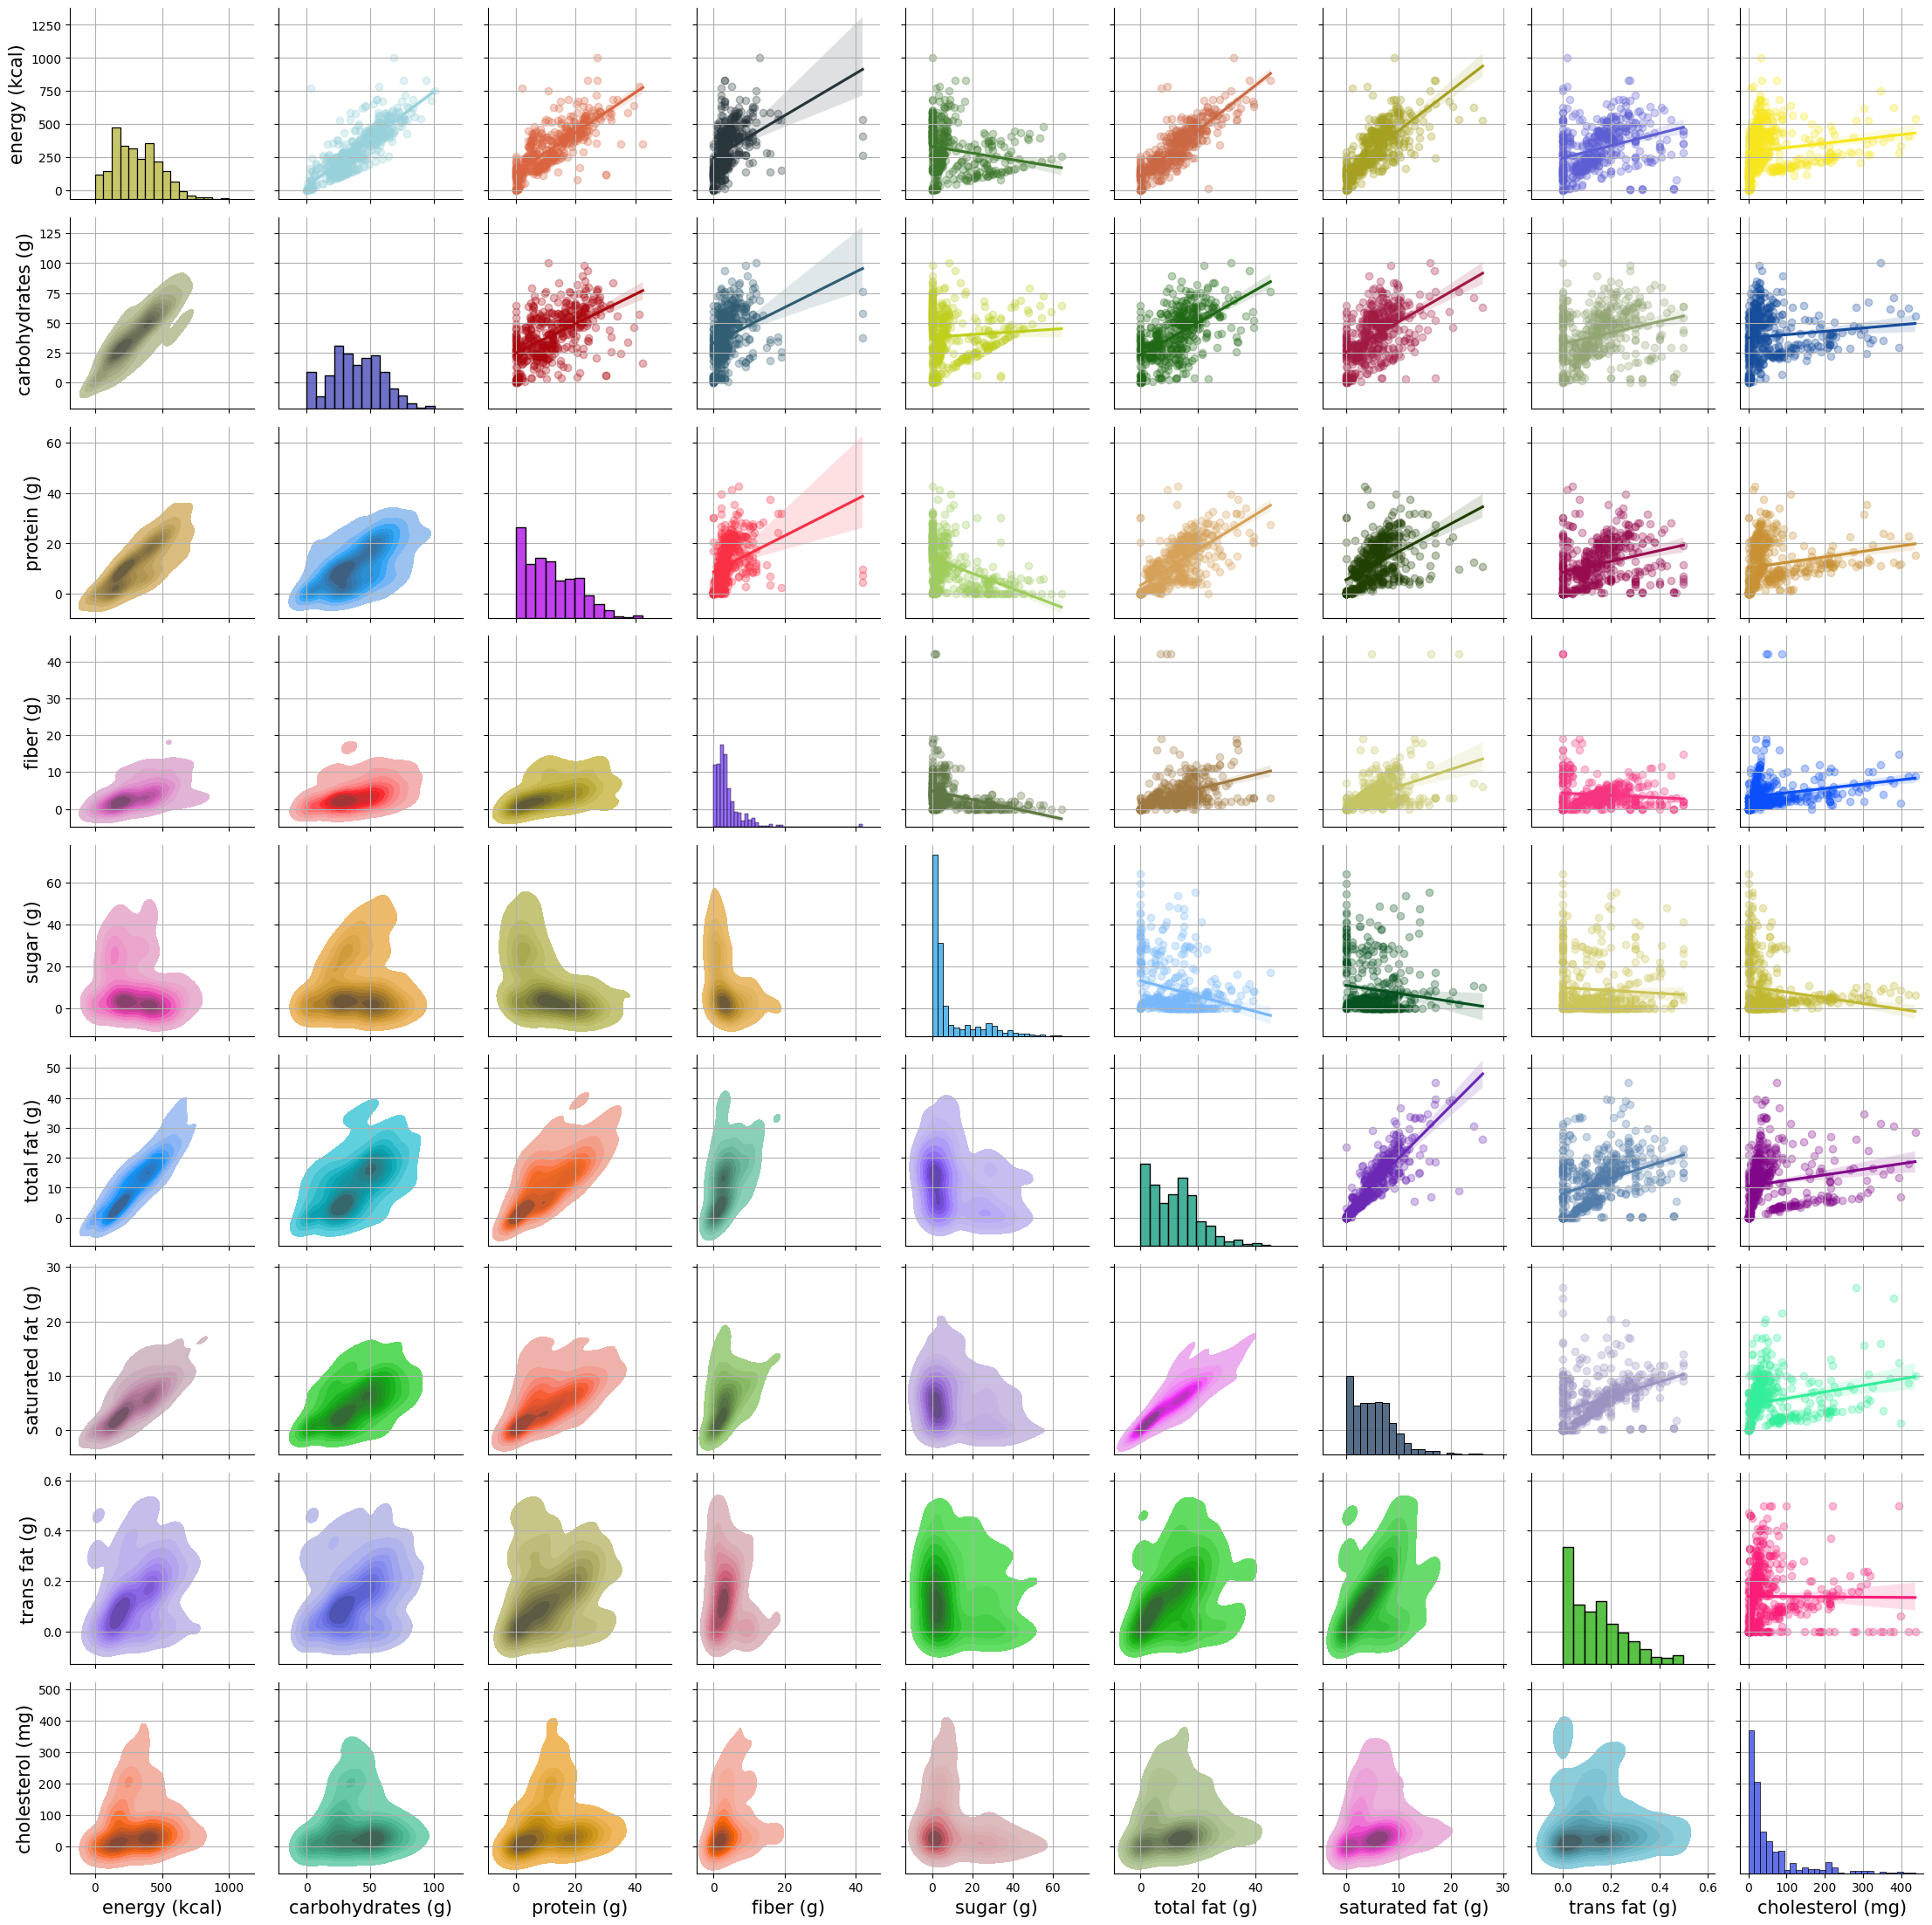

In [17]:
#Some cool settings
def my_regplot(x, y, **kwargs):
    kwargs['color'] = np.random.rand(3)
    sns.regplot(x=x, y=y, scatter_kws={'alpha':0.3}, **kwargs)

def my_kde(x, y, **kwargs):
    kwargs['color'] = np.random.rand(3)
    sns.kdeplot(x=x, y=y, fill = True,**kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = np.random.rand(3)
    sns.histplot(x, **kwargs)

graph = sns.PairGrid(num_df_out)
graph.map_diag(my_hist)
graph.map_upper(my_regplot)
graph.map_lower(my_kde)

We can notice a correlation of carbohydrates, proteins and fats with energy as one could expect, in particular with fats. \
Fats contribute 9 kcal/g while proteins and carbohydrates about 4-4.5 kcal/g so it's well explained by that. \
Also a correlation between proteins and fats due to fast food meat. \
Last but not least saturated fats and fats.

### Categorical features

In [18]:
cat_cols = data.select_dtypes(exclude=['float']).columns
cat_df = data.loc[:,cat_cols]
cat_df

,company,category,product,per serve size
0,pizza hut,all meals,corn n cheese (personal),143.5 g
1,pizza hut,all meals,country feast (personal),178 g
2,pizza hut,all meals,double cheese (personal),143 g
3,pizza hut,all meals,double paneer supreme (personal),174.5 g
4,pizza hut,all meals,farmer`s pick (personal),177 g
...,...,...,...,...
525,dominos,all meals,chicken wings,174.0
526,dominos,all meals,crispy chicken strips,156.0
527,dominos,all meals,zingy parcel chicken,210.0
528,dominos,all meals,taco mexicana - chicken,97.0


In [19]:
for col in cat_df.columns:
    print(cat_df[col].value_counts())

pizza hut      144
mcdonalds      140
dominos         87
kfc             72
starbucks       46
burger king     33
Name: company, dtype: int64
all meals                           336
mccafe menu                          60
regular menu                         36
gourmet menu                         17
hot breakfast                        12
desserts menu                        10
cookies, brownies & bars              9
croissants, danishes & bagels         9
condiments menu                       9
breakfast menu                        8
loaves, coffee cakes & cake pops      7
seasonal bakery offerings             6
fruit & yogurt                        3
Name: category, dtype: int64
medium fries                    3
corn n cheese (personal)        2
veggie lover (medium)           2
chicken supreme (medium)        2
chicken sausage (medium)        2
                               ..
mc egg burger for happy meal    1
mc egg masala burger            1
green chilli kebab naan         1
chi

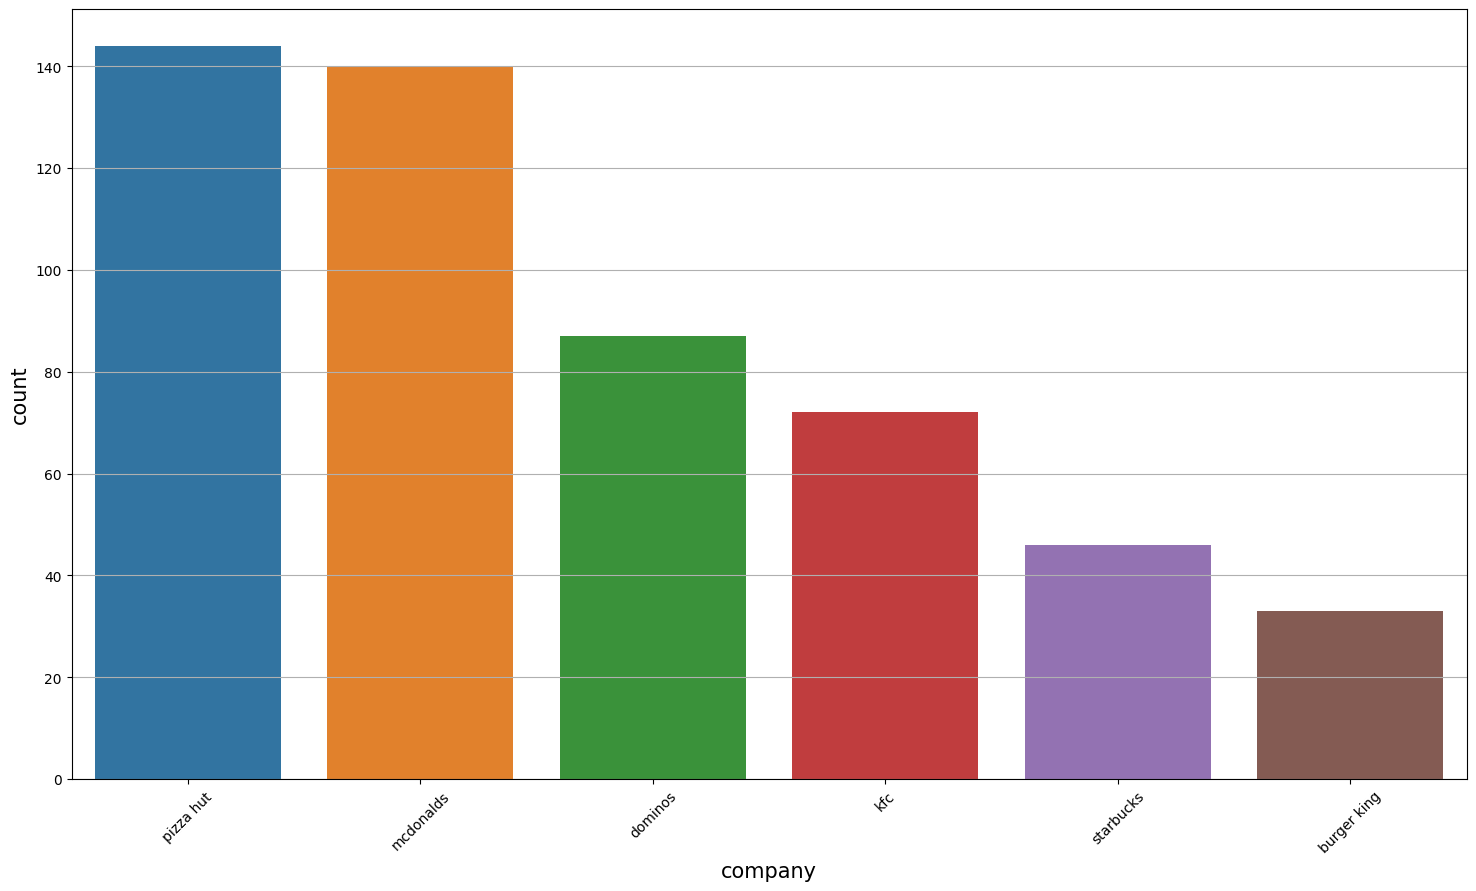

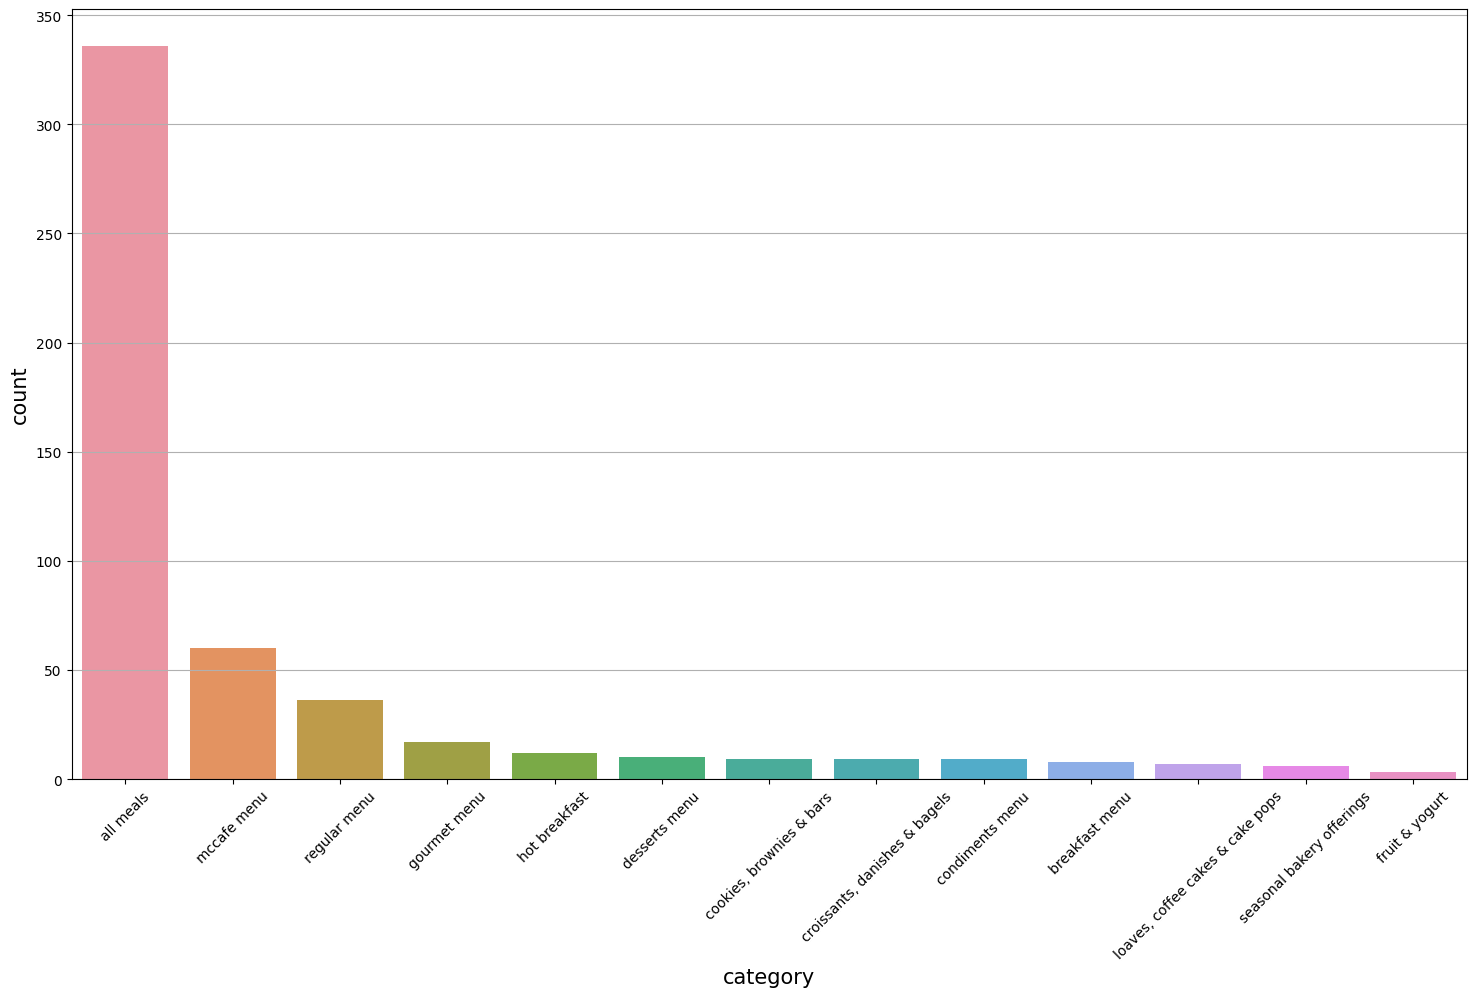

In [20]:
for col in cat_df.columns[:-2]:
    sns.countplot(data=cat_df, x=col, order=cat_df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'all meals'),
  Text(1, 0, 'hot breakfast'),
  Text(2, 0, 'cookies, brownies & bars'),
  Text(3, 0, 'croissants, danishes & bagels'),
  Text(4, 0, 'loaves, coffee cakes & cake pops'),
  Text(5, 0, 'seasonal bakery offerings'),
  Text(6, 0, 'fruit & yogurt'),
  Text(7, 0, 'regular menu'),
  Text(8, 0, 'breakfast menu'),
  Text(9, 0, 'mccafe menu'),
  Text(10, 0, 'desserts menu'),
  Text(11, 0, 'gourmet menu'),
  Text(12, 0, 'condiments menu')])

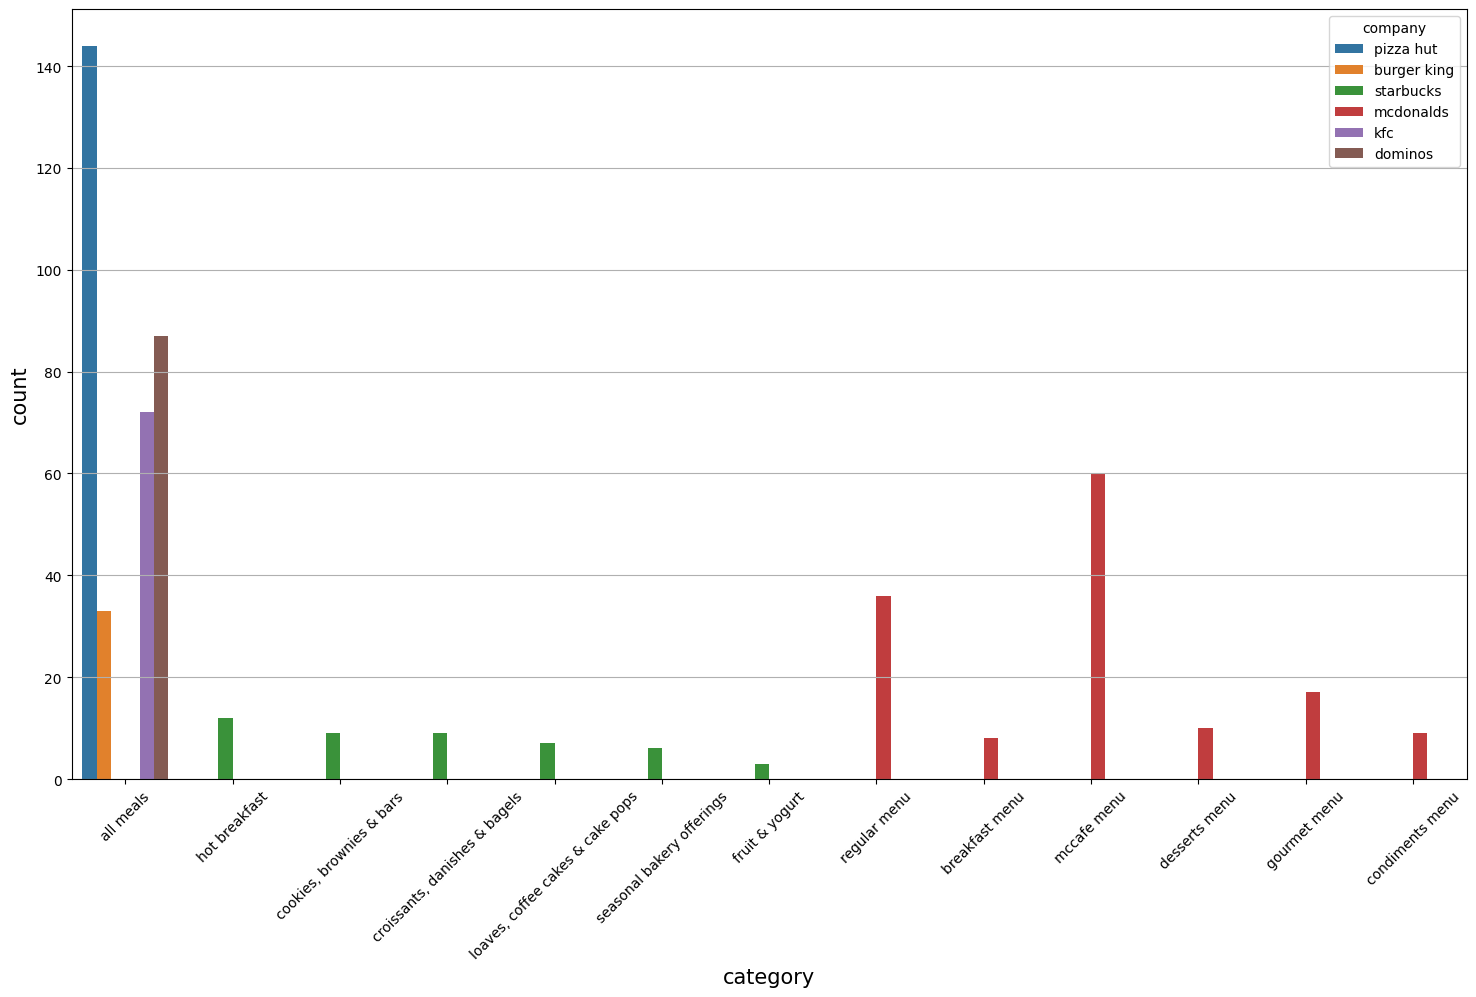

In [21]:
sns.countplot(data=cat_df, x='category', hue='company')
plt.xticks(rotation=45)

We can note that starbucks and mcdonald's have their own categories.

Now let's try to put all together and try to have a better insight. \
As first we need to apply the same filters applied on the numerical part to all dataframe.

In [22]:
df = data[filters].copy()
df

,company,category,product,per serve size,energy (kcal),carbohydrates (g),protein (g),fiber (g),sugar (g),total fat (g),saturated fat (g),trans fat (g),cholesterol (mg)
0,pizza hut,all meals,corn n cheese (personal),143.5 g,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19
1,pizza hut,all meals,country feast (personal),178 g,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80
2,pizza hut,all meals,double cheese (personal),143 g,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75
3,pizza hut,all meals,double paneer supreme (personal),174.5 g,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72
4,pizza hut,all meals,farmer`s pick (personal),177 g,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,dominos,all meals,cheese & pepperoni regular,68.0,189.00,23.10,9.20,4.56,3.2,6.70,3.80,0.15,154.77
516,dominos,all meals,cheese & pepperoni medium,75.0,210.00,25.60,10.20,5.16,3.6,7.40,4.30,0.17,189.44
517,dominos,all meals,cheese & pepperoni large,97.0,272.30,33.20,13.20,6.60,4.1,9.60,5.50,0.22,318.72
518,dominos,all meals,garlic breadsticks,122.0,340.30,57.60,11.90,1.68,8.5,6.90,1.40,0.06,397.44


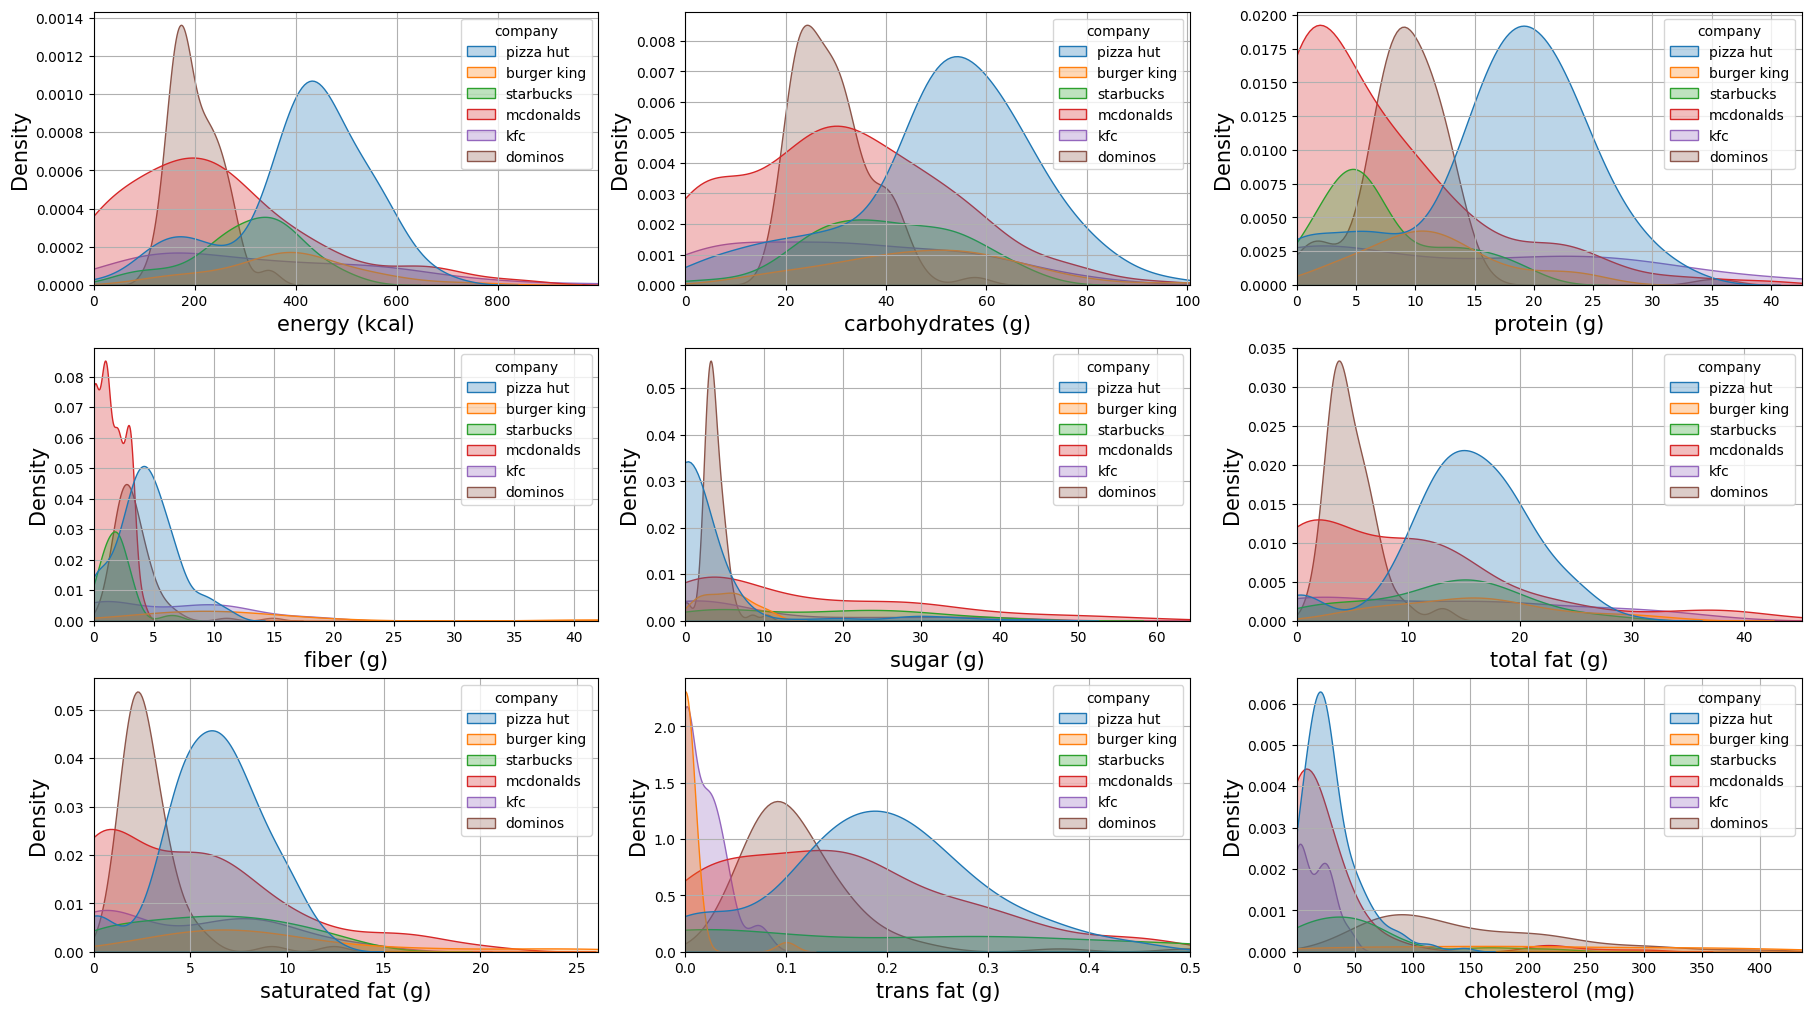

In [23]:
_, axes = plt.subplots(3, 3, constrained_layout=True)
for col, ax in zip(num_df.columns, axes.flatten()):
    sns.kdeplot(data=df, x=col, ax=ax, hue='company', fill=True, alpha=0.3)
    ax.set_xlim(left=0, right=df[col].max())

From the graph above we can say that in average pizza hut meals have more calories. \
This becomes particularly evident noticing that the distribution of total fats has the highest mean above all companies.

Except for Mc an Starbucks we don't know the categories of other companies meals, but by common knowledge there is a marked differnce in the products sold by Starbucks.

Let's have a look at meals from mc

In [24]:
mc = df[(df.company == 'mcdonalds')]

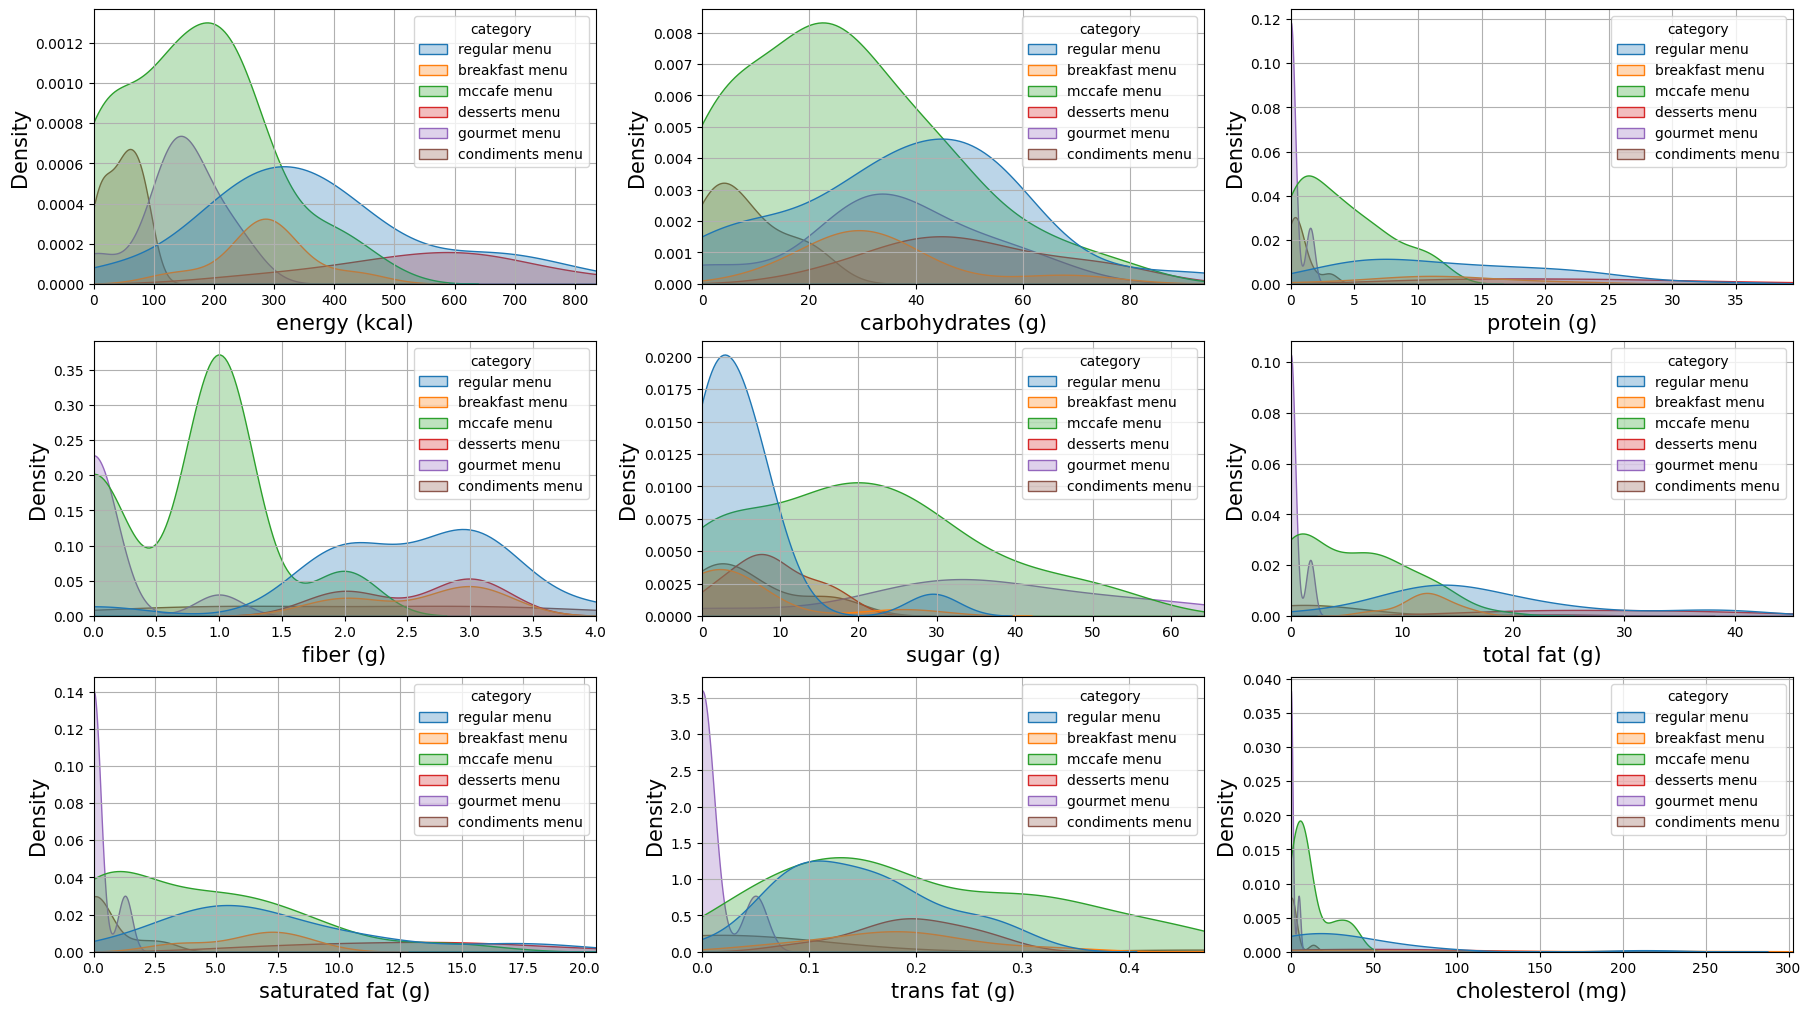

In [25]:
_, axes = plt.subplots(3, 3, constrained_layout=True)
for col, ax in zip(num_df.columns, axes.flatten()):
    sns.kdeplot(data=mc, x=col, ax=ax, hue='category', fill=True, alpha=0.3)
    ax.set_xlim(left=0, right=mc[col].max())

Desserts menu are the highest in kcals followed by regular menu, also mcmenuu are fattier than breakfasts and mccafe menu. \
Unforunately we have too few data to extract other informations on every category.

What we can try to do now is to predict given only nutritional values what would be the company. \
Considering category would be like cheating because for starbucks and mcdonald we would have a perfect match. \
Also we must take into account that 

# Modeling

In [26]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from plottings import plot_learning_curve

Data don't need much preprocessing, let's scale numerical columns, drop categoricals and at last encode company.

In [27]:
le = LabelEncoder()
X = df.iloc[:,1:]
y = le.fit_transform(df.iloc[:,0])

X_train, X_test, y_train, y_test = train_test_split(X, y)

preproc = ColumnTransformer(transformers=[
    ('dropper', 'drop', [0,1,2]),
    ('scaler', StandardScaler(), numeric_cols)],
    remainder='passthrough')

## XGBoost

In [28]:
pipe = Pipeline(steps=[('preprocessing', preproc),
                       ('model',XGBClassifier())])

print(cross_val_score(pipe, X_train, y_train, cv=10, scoring='f1_weighted').mean())

0.8490766052604345


<module 'matplotlib.pyplot' from 'c:\\Users\\ggiam\\anaconda3\\envs\\py10\\lib\\site-packages\\matplotlib\\pyplot.py'>

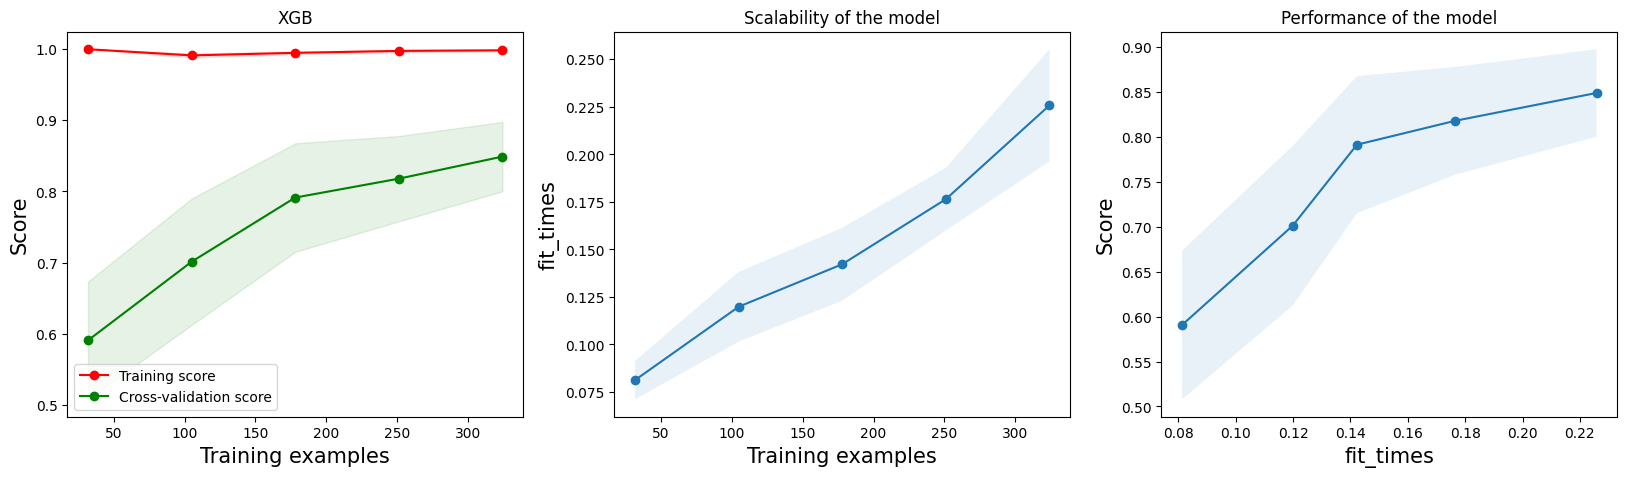

In [29]:
plot_learning_curve(pipe, 'XGB', X_train, y_train, cv = 10, n_jobs=-1, scoring='f1_weighted')

The model is overfitting badly, we will see if we can reduce it.

In [30]:
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       1.00      1.00      1.00        24
           2       0.46      0.86      0.60         7
           3       0.79      0.84      0.82        32
           4       0.89      0.87      0.88        38
           5       1.00      0.60      0.75        10

    accuracy                           0.85       120
   macro avg       0.86      0.81      0.81       120
weighted avg       0.88      0.85      0.85       120



The recall on the target 2 is really low, but aside from that it looks promising. \
Let's see if we can achieve better with a bit of tuning

<AxesSubplot: >

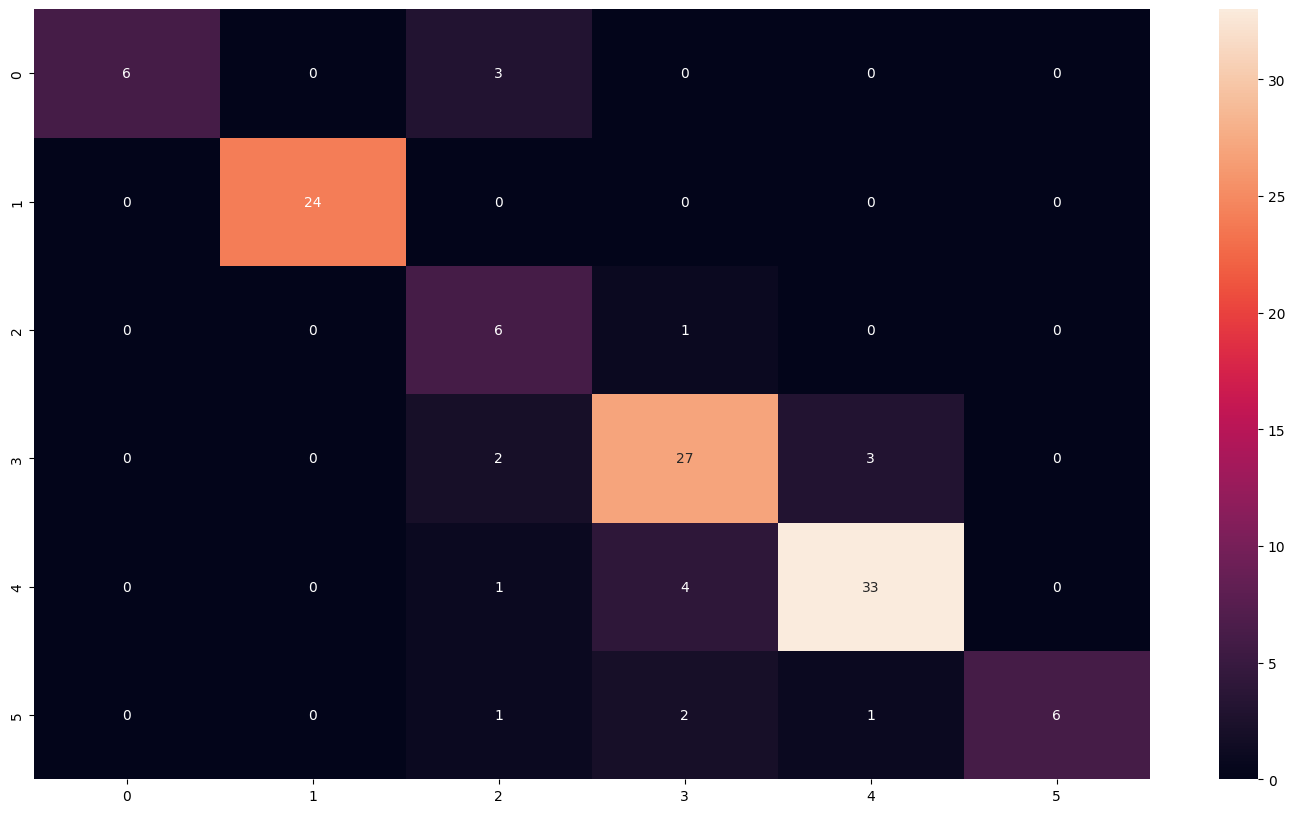

In [31]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

In [32]:
xgb_params = {'model__max_depth': [i for i in range(2,4)],
              'model__learning_rate': [0.001, 0.005, 0.01],
              'model__n_estimators': [i for i in range(50, 101, 10)]
             }
              
xgb_grid = GridSearchCV(pipe,
                        param_grid=xgb_params,
                        cv = 5,
                        n_jobs=-1,
                        scoring='f1_weighted')

xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('dropper',
                                                                         'drop',
                                                                         [0, 1,
                                                                          2]),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         Index(['energy (kcal)', 'carbohydrates (g)', 'protein (g)', 'fiber (g)',
       'sugar (g)', 'total fat (g)', 'saturated fat (g)', 'trans fat (g)',
       'cholesterol (mg)'],
      dtype='object'))])),
                                       ('model',
                                        XGBClassi...
                                                      max_delta_step=0,
                                                      max_depth=6, max_leaves=0,
                                                      min_child_weight=1,
                                                      missing=nan,
                                                      monotone_constraints='()',
                                                      n_estimators=100,
                                                      n_jobs=0,
                                                      num_parallel_tree=1,
                                                      objective='multi:softprob',
                                                      predictor='auto', ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.001, 0.005, 0.01],
                         'model__max_depth': [2, 3],
                         'model__n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='f1_weighted')

In [33]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.7884731065942914
{'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 90}


<module 'matplotlib.pyplot' from 'c:\\Users\\ggiam\\anaconda3\\envs\\py10\\lib\\site-packages\\matplotlib\\pyplot.py'>

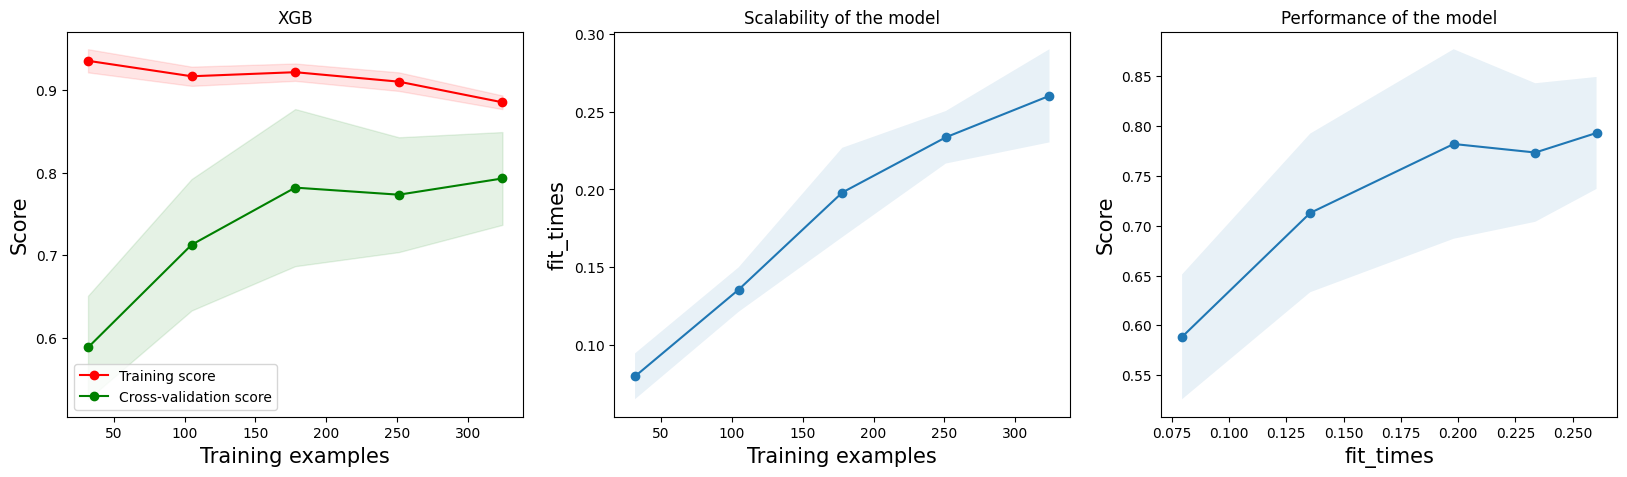

In [34]:
plot_learning_curve(xgb_grid.best_estimator_, 'XGB', X_train, y_train, cv = 10, n_jobs=-1, scoring='f1_weighted')

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       1.00      0.83      0.91        24
           2       0.35      1.00      0.52         7
           3       0.73      0.75      0.74        32
           4       0.91      0.82      0.86        38
           5       0.50      0.30      0.37        10

    accuracy                           0.76       120
   macro avg       0.72      0.73      0.69       120
weighted avg       0.81      0.76      0.77       120



<AxesSubplot: >

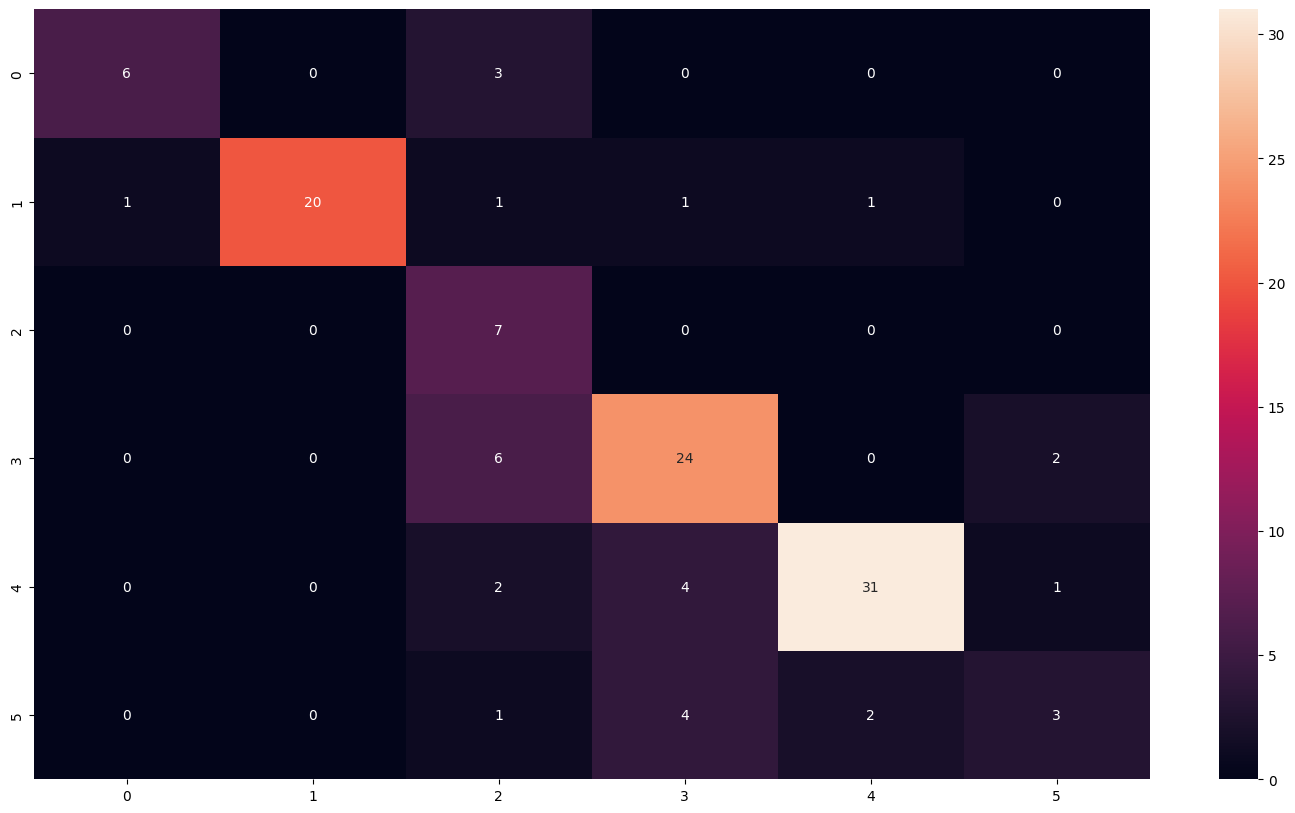

In [35]:
pred = xgb_grid.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

We reduced overfitting but we worsen the results, let's try a simpler model and see if it's better.

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
pipe_lr = Pipeline(steps=[('preprocessing', preproc),
                       ('model',LogisticRegression())])

pipe_lr.fit(X_train, y_train)

print(cross_val_score(pipe_lr, X_train, y_train, cv=10, scoring='f1_weighted').mean())

0.7485555476602388


<module 'matplotlib.pyplot' from 'c:\\Users\\ggiam\\anaconda3\\envs\\py10\\lib\\site-packages\\matplotlib\\pyplot.py'>

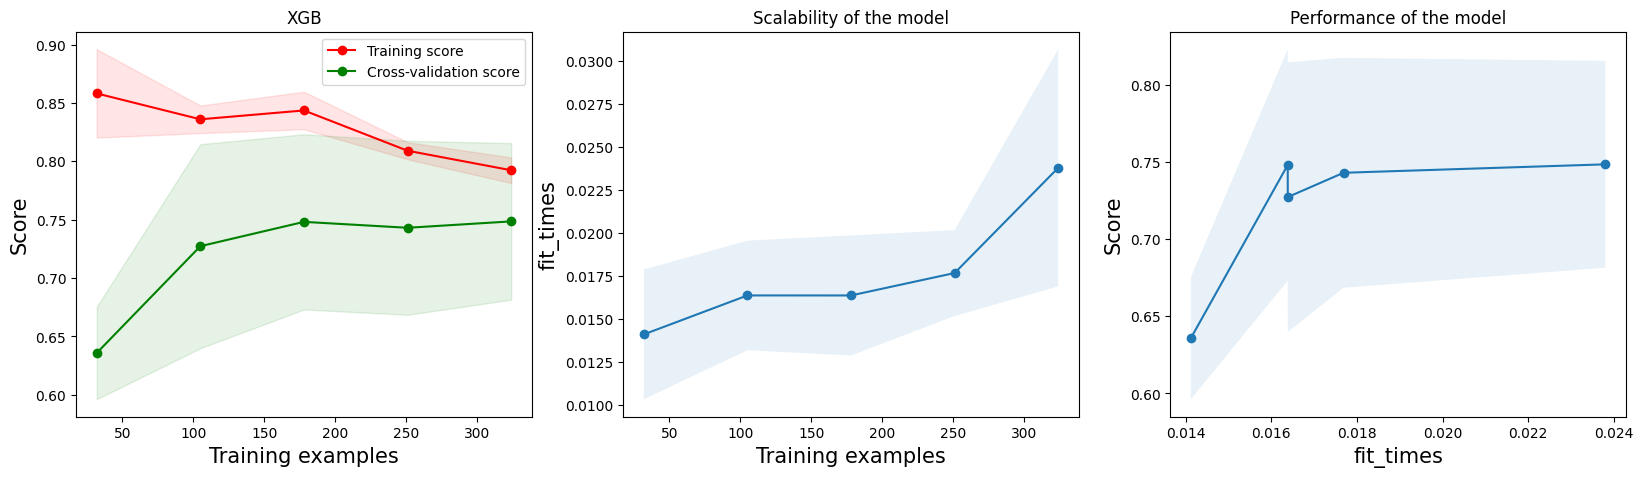

In [38]:
plot_learning_curve(pipe_lr, 'XGB', X_train, y_train, cv = 10, n_jobs=-1, scoring='f1_weighted')

              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.89      1.00      0.94        24
           2       0.55      0.86      0.67         7
           3       0.64      0.72      0.68        32
           4       0.76      0.74      0.75        38
           5       0.50      0.20      0.29        10

    accuracy                           0.73       120
   macro avg       0.72      0.68      0.67       120
weighted avg       0.74      0.73      0.72       120



<AxesSubplot: >

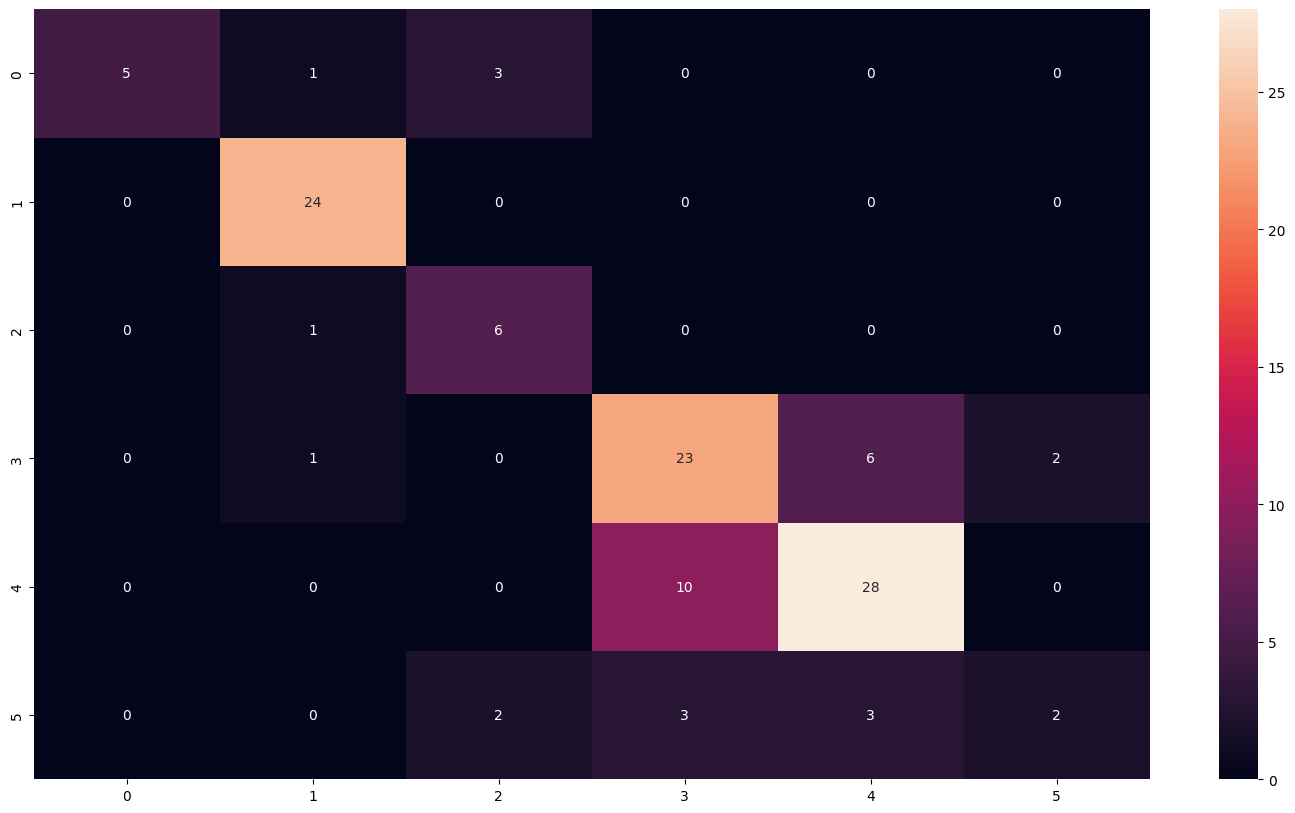

In [39]:
pred = pipe_lr.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

Not really a good score, but at least the model isn't overfitting. \
Let's try a bit of tuning

In [40]:
lr_params = {'model__C': [2 ,5, 10, 100, 500, 1000],
              'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
             }
              
lr_grid = GridSearchCV(pipe_lr,
                        param_grid=lr_params,
                        cv = 5,
                        n_jobs=-1,
                        scoring='f1_weighted')

lr_grid.fit(X_train, y_train)

c:\Users\ggiam\anaconda3\envs\py10\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('dropper',
                                                                         'drop',
                                                                         [0, 1,
                                                                          2]),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         Index(['energy (kcal)', 'carbohydrates (g)', 'protein (g)', 'fiber (g)',
       'sugar (g)', 'total fat (g)', 'saturated fat (g)', 'trans fat (g)',
       'cholesterol (mg)'],
      dtype='object'))])),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [2, 5, 10, 100, 500, 1000],
                         'model__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                           'sag', 'saga']},
             scoring='f1_weighted')

In [41]:
print(lr_grid.best_score_)
print(lr_grid.best_params_)

0.7825748033207394
{'model__C': 1000, 'model__solver': 'lbfgs'}


<module 'matplotlib.pyplot' from 'c:\\Users\\ggiam\\anaconda3\\envs\\py10\\lib\\site-packages\\matplotlib\\pyplot.py'>

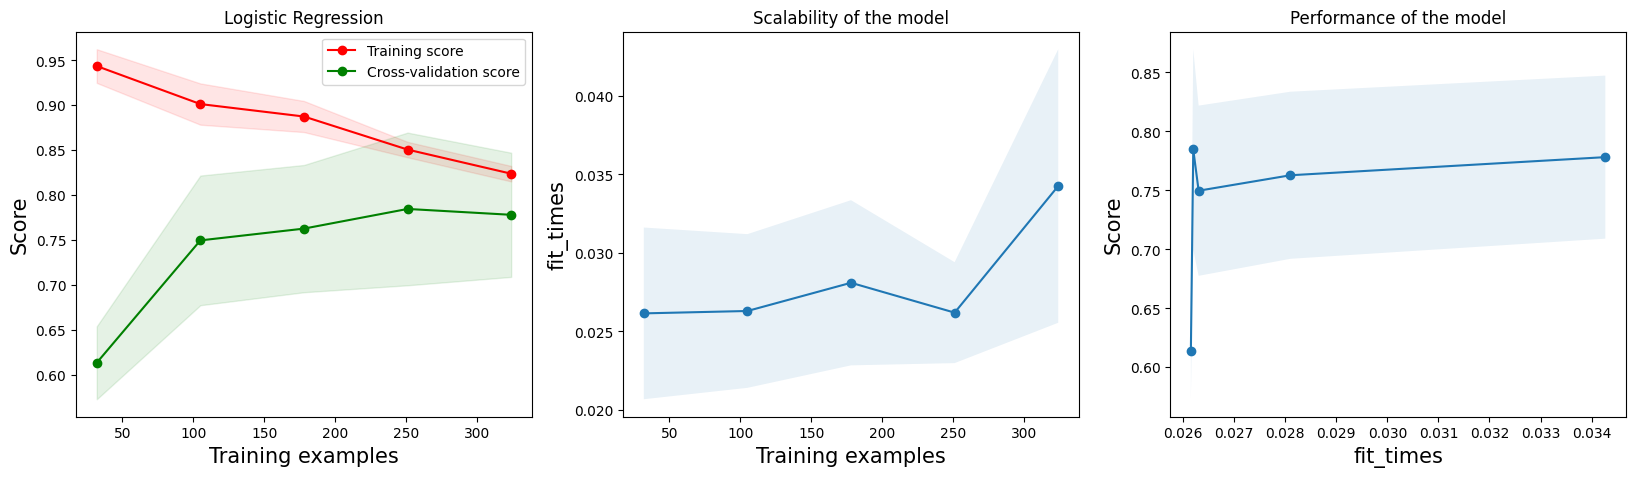

In [42]:
plot_learning_curve(lr_grid.best_estimator_, 'Logistic Regression', X_train, y_train, cv = 10, n_jobs=-1, scoring='f1_weighted')

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       1.00      1.00      1.00        24
           2       0.62      0.71      0.67         7
           3       0.67      0.69      0.68        32
           4       0.78      0.76      0.77        38
           5       0.50      0.40      0.44        10

    accuracy                           0.77       120
   macro avg       0.73      0.74      0.73       120
weighted avg       0.76      0.77      0.76       120



<AxesSubplot: >

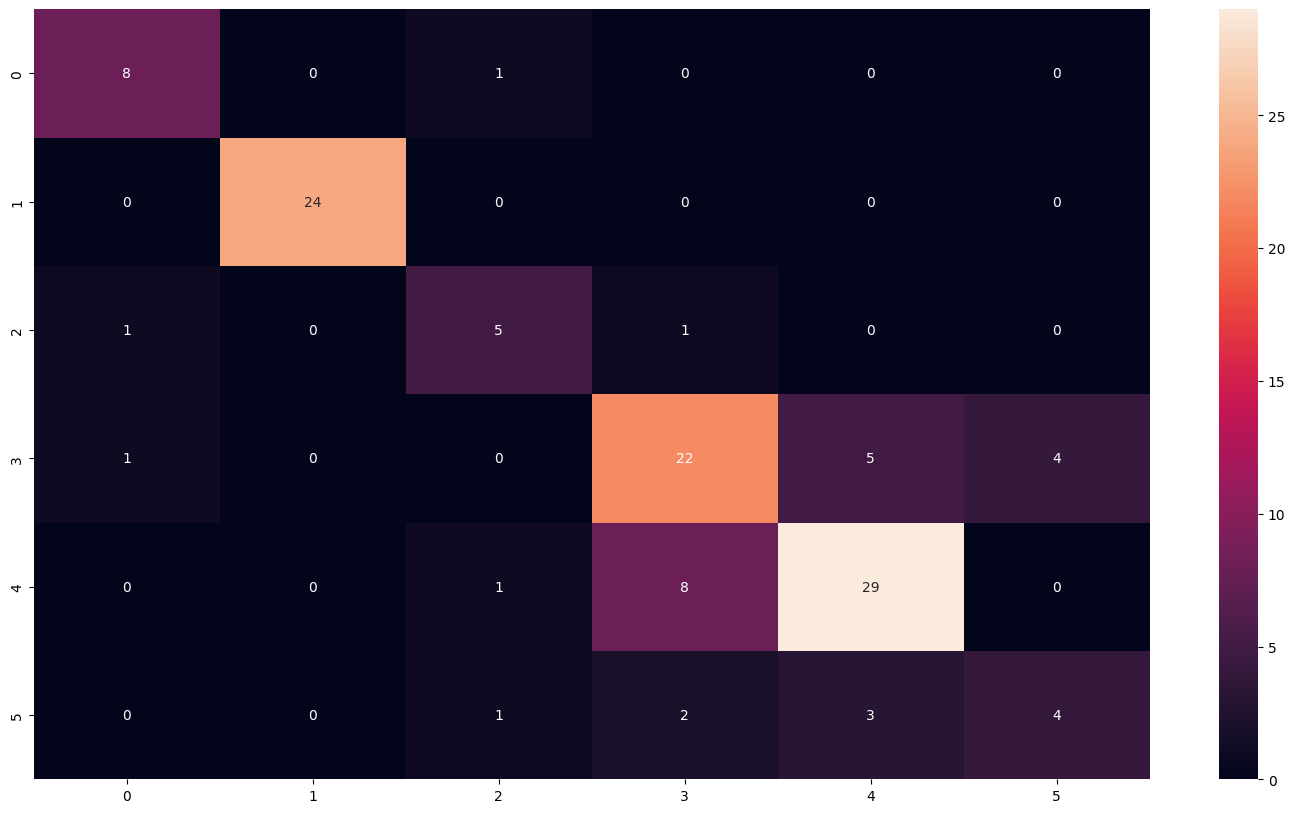

In [43]:
pred = lr_grid.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

Slightly increased. \
Now let's try to do something else, let's try a really shallow neural network and we try to increase the complexity unti the score start decreasing. (Honestly I just want to practice with PyTorch)

## Neural Network